In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2010-01-01'
end = '2022-06-11'

df = data.DataReader('AAPL','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
...,...,...,...,...,...,...
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,146.139999
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,146.139999
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007
2022-06-09,147.949997,142.529999,147.080002,142.639999,69473000.0,142.639999
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


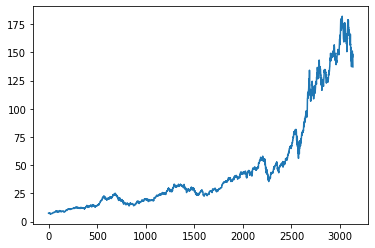

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3128,148.570007,144.899994,147.029999,146.139999,71598400.0
3129,149.000000,144.100006,144.350006,148.710007,67808200.0
3130,149.869995,147.460007,148.580002,147.960007,53950200.0
3131,147.949997,142.529999,147.080002,142.639999,69473000.0


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3128    162.429700
3129    162.161501
3130    161.919201
3131    161.614901
3132    161.288201
Name: Close, Length: 3133, dtype: float64

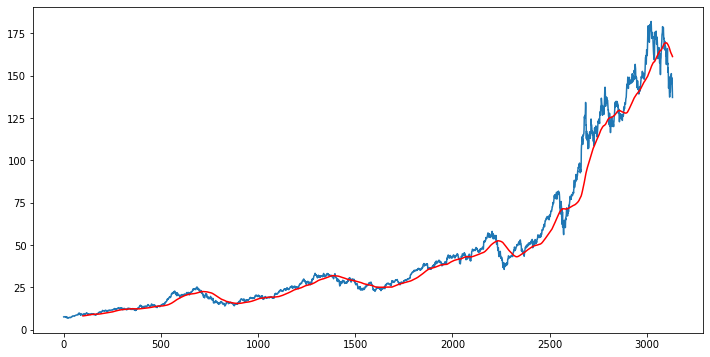

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3128    159.48405
3129    159.48665
3130    159.47790
3131    159.44300
3132    159.38685
Name: Close, Length: 3133, dtype: float64

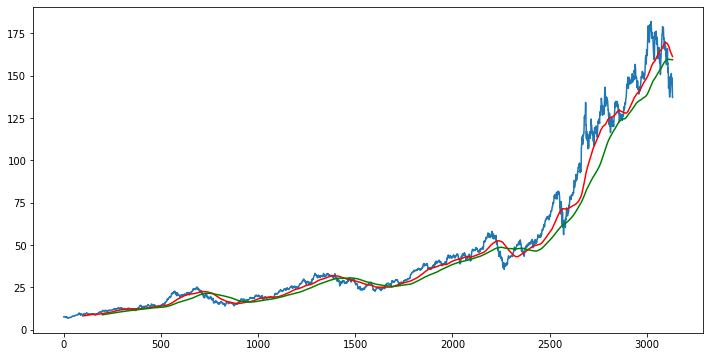

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(3133, 5)

In [15]:
#splitting data into traning and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2193, 1)
(940, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_testing.head()

,Close
2193,54.560001
2194,54.592499
2195,55.007500
2196,54.415001
2197,55.197498


In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.99029487],
       [0.97750394],
       [0.94784107]])

In [20]:
data_training_array.shape

(2193, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True , input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))







In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
66/66 [==============================] - 29s 307ms/step - loss: 0.0290
Epoch 2/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0076
Epoch 3/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0058
Epoch 4/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0051
Epoch 5/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0051
Epoch 6/50
66/66 [==============================] - 18s 275ms/step - loss: 0.0050
Epoch 7/50
66/66 [==============================] - 18s 277ms/step - loss: 0.0048
Epoch 8/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0039
Epoch 9/50
66/66 [==============================] - 20s 298ms/step - loss: 0.0039
Epoch 10/50
66/66 [==============================] - 20s 296ms/step - loss: 0.0038
Epoch 11/50
66/66 [==============================] - 19s 285ms/step - loss: 0.0040
Epoch 12/50
66/66 [==============================] - 18s 273ms/step - loss: 0.0037
Epoch 13/50
6

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()

,Close
2193,54.560001
2194,54.592499
2195,55.007500
2196,54.415001
2197,55.197498


In [37]:
data_training.tail(100)

,Close
2093,41.055000
2094,40.580002
2095,41.314999
2096,42.275002
2097,44.142502
...,...
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999


In [38]:
past_100_days = data_training.tail(100)

In [41]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\user\AppData\Local\Temp\ipykernel_46420\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [42]:
final_df.head()

,Close
0,41.055000
1,40.580002
2,41.314999
3,42.275002
4,44.142502


In [43]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.03760348],
       [0.03436034],
       [0.03937867],
       ...,
       [0.76751736],
       [0.73119401],
       [0.6935735 ]])

In [44]:
input_data.shape

(1040, 1)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [46]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(940, 100, 1)
(940,)


In [47]:
#making predictions

y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(940, 1)

In [49]:
y_test

array([0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872578,
       0.08541435, 0.07614578, 0.08401469, 0.08763335, 0.07454126,
       0.05938379, 0.05904241, 0.05137833, 0.05535546, 0.05470684,
       0.06614321, 0.06377059, 0.06211488, 0.07276608, 0.0588888 ,
       0.05552616, 0.04489204, 0.04678673, 0.04513101, 0.04593327,
       0.04909106, 0.03975419, 0.03712555, 0.0407613 , 0.03191943,
       0.02498933, 0.0145771 , 0.00792012, 0.02556968, 0.02382861,
       0.02396517, 0.02654264, 0.02684987, 0.        , 0.01036

In [54]:
y_predicted

array([[ 8.68529  ],
       [ 8.713503 ],
       [ 8.73125  ],
       [ 8.739727 ],
       [ 8.739597 ],
       [ 8.733258 ],
       [ 8.723806 ],
       [ 8.712997 ],
       [ 8.704281 ],
       [ 8.700611 ],
       [ 8.704476 ],
       [ 8.718094 ],
       [ 8.743723 ],
       [ 8.77987  ],
       [ 8.822074 ],
       [ 8.86567  ],
       [ 8.908407 ],
       [ 8.944459 ],
       [ 8.968781 ],
       [ 8.981128 ],
       [ 8.980965 ],
       [ 8.970817 ],
       [ 8.9533   ],
       [ 8.928812 ],
       [ 8.899185 ],
       [ 8.8669815],
       [ 8.835509 ],
       [ 8.803923 ],
       [ 8.773186 ],
       [ 8.742649 ],
       [ 8.710169 ],
       [ 8.674614 ],
       [ 8.638093 ],
       [ 8.604542 ],
       [ 8.570886 ],
       [ 8.532407 ],
       [ 8.486359 ],
       [ 8.433761 ],
       [ 8.376108 ],
       [ 8.313853 ],
       [ 8.244824 ],
       [ 8.167297 ],
       [ 8.079526 ],
       [ 7.982551 ],
       [ 7.879114 ],
       [ 7.76943  ],
       [ 7.652664 ],
       [ 7.52

In [51]:
scalar.scale_

array([0.00682769])

In [52]:
scale_factor = 1/0.020999517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

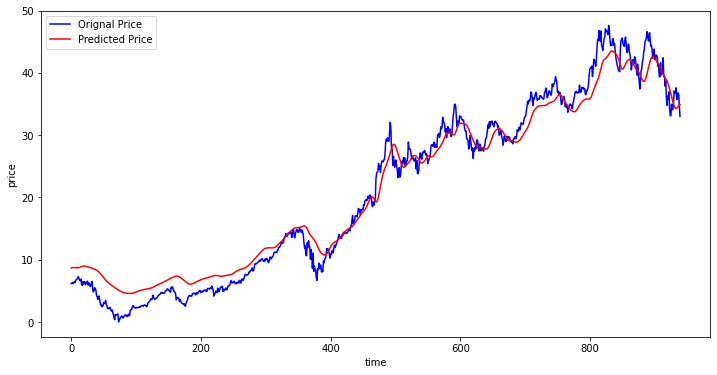

In [53]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()